--------------------------------------------------------------------------------------------------------------------------------
## Data visualization

--------------------------------------------------------------------------------------------------------------------------------
#### Things you would learn:

    Use of lambda

    Use of Frame

    Use of fig

    Use of subtable


##### Duration of excercise : 15min - 30min

--------------------------------------------------------------------------------------------------------------------------------



In [4]:
#Importing pandas and matplotlib 

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Importing the dataset 'names/youb1880.txt' and labelling the columns

names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
5      Margaret   F    1578
6           Ida   F    1472
7         Alice   F    1414
8        Bertha   F    1320
9         Sarah   F    1288
10        Annie   F    1258
11        Clara   F    1226
12         Ella   F    1156
13     Florence   F    1063
14         Cora   F    1045
15       Martha   F    1040
16        Laura   F    1012
17       Nellie   F     995
18        Grace   F     982
19       Carrie   F     949
20        Maude   F     858
21        Mabel   F     808
22       Bessie   F     796
23       Jennie   F     793
24     Gertrude   F     787
25        Julia   F     783
26       Hattie   F     769
27        Edith   F     768
28       Mattie   F     704
29         Rose   F     700
...         ...  ..     ...
1970      Philo   M       5
1971    Phineas   M       5
1972    Presley   M       5
1973     Ransom   M       5
1974      Reece   M       5
1975       Rene   M       5
1976    Roswell   M       5
1977    Rowland   M       5
1978    Sampson   M       5
1979     Samual   M       5
1980     Santos   M       5
1981   Schuyler   M       5
1982   Sheppard   M       5
1983   Spurgeon   M       5
1984   Starling   M       5
1985   Sylvanus   M       5
1986   Theadore   M       5
1987  Theophile   M       5
1988     Tilmon   M       5
1989      Tommy   M       5
1990    Unknown   M       5
1991       Vann   M       5
1992        Wes   M       5
1993    Winston   M       5
1994       Wood   M       5
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]

In [6]:
# Writing a function a have all the data of all the years, as each year has a text file.
#Creating a empty dataframe called 'pieces'
years = range(1880, 2013)
pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'names/yob%d.txt' % year   #Defininng the path 
    frame = pd.read_csv(path,names=columns) #Frame with the data
    frame['year'] = year 
    pieces.append(frame)
    

#Concatenating the dataframe pieces to the new dataframe 'names'     
names = pd.concat(pieces, ignore_index=True)

In [7]:
names[:5]

name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

In [8]:
names[-3:]

name sex  births  year
1759501      Zyrin   M       5  2012
1759502      Zyrus   M       5  2012
1759503  Zytaevius   M       5  2012

In [9]:
# Calculating the total no of births 

total_births = names.pivot_table('births', index ='year',columns='sex',aggfunc=sum)
total_births.head()

sex        F       M
year                
1880   90992  110491
1881   91953  100743
1882  107847  113686
1883  112318  104627
1884  129020  114443

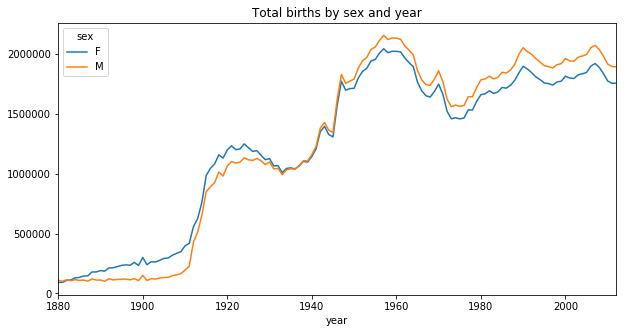

In [10]:
#Plotting the graph for the total births over the years as per gender
total_births.plot(figsize=(10,5),title='Total births by sex and year')
plt.show()

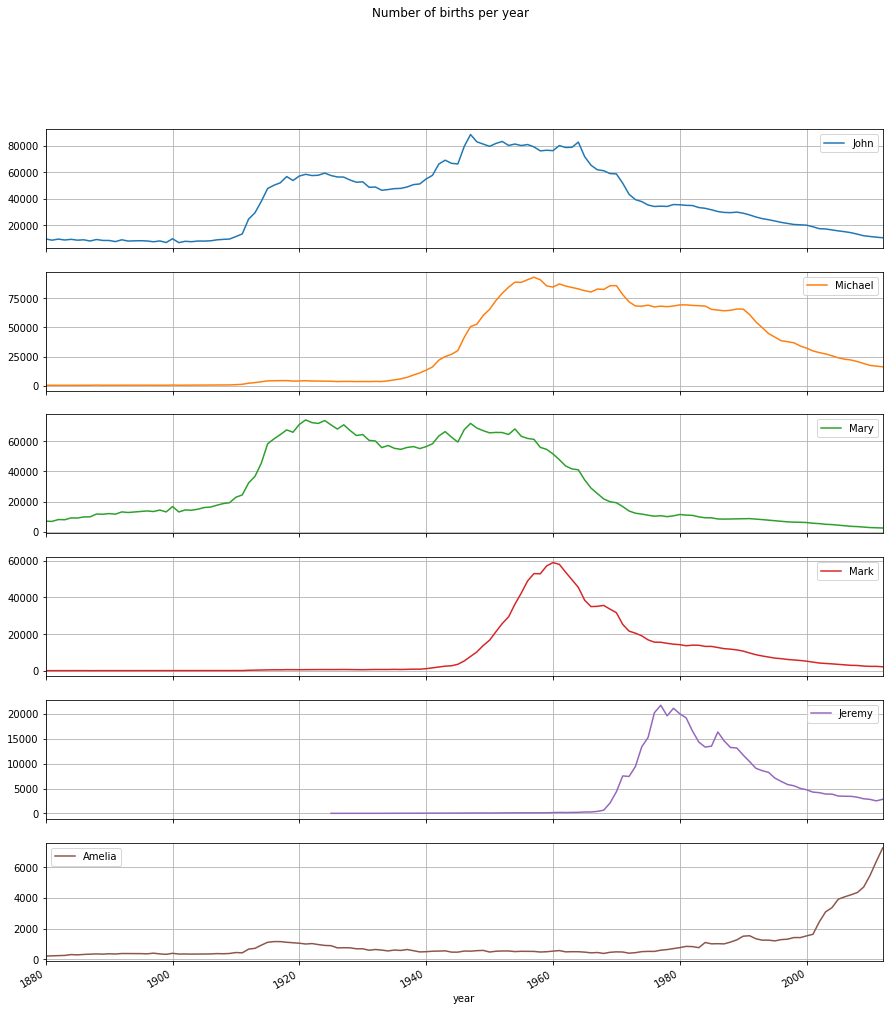

In [11]:
#Creating a pivot table to filter births and year  according to name
total_births = names.pivot_table('births', index='year', columns='name', aggfunc=sum)

#creating the subset of names that we are interested in and plot it.
subset = total_births[['John', 'Michael', 'Mary', 'Mark','Jeremy','Amelia']]
subset.plot(subplots=True, figsize=(15, 17), grid=True,title="Number of births per year")
plt.show()

In [12]:
#Using the lambda function to get the last letter from name column 
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc=sum)

In [13]:
#Selecting a subtable with years spanning over 100 years

subtable = table.reindex(columns=[1912, 1962, 2012], level='year')
subtable.head()

sex                 F                            M                    
year             1912      1962      2012     1912      1962      2012
last_letter                                                           
a            149177.0  682549.0  654170.0   1655.0    5334.0   27186.0
b                 NaN     459.0     471.0    923.0    3457.0   34685.0
c                 NaN      73.0    1235.0   1053.0   17881.0   24256.0
d             10523.0    3673.0    2524.0  54090.0  250011.0   42436.0
e            180522.0  424769.0  320334.0  54716.0  164974.0  128345.0

In [14]:
#Further normalizing the table by number of births for each sex ending last letter
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head()

sex                 F                             M                    
year             1912      1962      2012      1912      1962      2012
last_letter                                                            
a            0.267287  0.347068  0.372461  0.003849  0.002578  0.014368
b                 NaN  0.000233  0.000268  0.002147  0.001671  0.018332
c                 NaN  0.000037  0.000703  0.002449  0.008643  0.012820
d            0.018855  0.001868  0.001437  0.125806  0.120843  0.022428
e            0.323449  0.215990  0.182387  0.127262  0.079741  0.067832

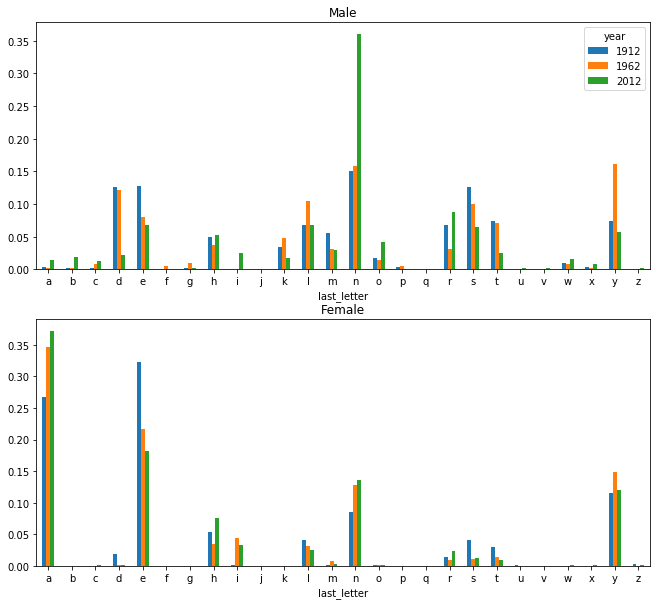

In [15]:
#Plotting the letter proportions , makng bar charts for each sex broken by year
fig, axes = plt.subplots(2, 1, figsize=(11, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)
plt.show()